### Connor Contursi - Task 3

# Data Processing

In [118]:
# module imports
import numpy as np
import pandas as pd
import os

# Sklearn module imports
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

wave_path = 'C:/Users/indie/Documents/495/IMU class data/wave'
fist_path = 'C:/Users/indie/Documents/495/IMU class data/fistbump'
#---------------------------------------------------

# Combines class data for waves into single set
class_wave = pd.DataFrame()
wave_files = 0

for subdir, dirs, files in os.walk(wave_path):
    for file in files:
        os.chdir(subdir)
        wave_array = np.genfromtxt(file, delimiter=",", dtype=str, usecols=range(6),skip_header=1)
        wave_array = wave_array.reshape(50, 119*6)
        wave_data_array = pd.DataFrame(wave_array)
        class_wave = pd.concat([class_wave, wave_data_array])
        wave_files += 1
#----------------------------------------------------------------------------------                
        
# Combines class data for fistbumps into single set
class_fistbump = pd.DataFrame()
fist_files = 0

for subdir, dirs, files in os.walk(fist_path):
    for file in files:
        os.chdir(subdir)
        fist_array = np.genfromtxt(file, delimiter=",", dtype=str, usecols=range(6),skip_header=1)
        fist_array = fist_array.reshape(50, 119*6)
        fist_data_array = pd.DataFrame(fist_array)
        class_fistbump = pd.concat([class_fistbump, fist_data_array])
        fist_files += 1
#----------------------------------------------------------------------------------        

# Combines all of class data for wave and fistbumps into single set
class_data = pd.concat([class_wave, class_fistbump])

# Creates y labels
y = np.zeros(100 * (wave_files))
for a in range (50 * (wave_files), 100 * (wave_files), 1):
    y[a] = 1

### Logistic Regression Model & Results

              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88       226
         1.0       0.84      0.90      0.87       194

    accuracy                           0.87       420
   macro avg       0.87      0.88      0.87       420
weighted avg       0.88      0.87      0.87       420



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


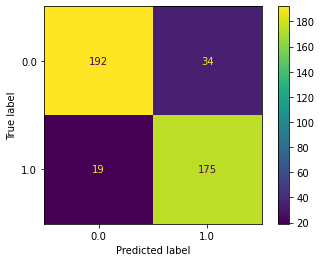

In [122]:
# Train test split of 80-20
x_train, x_test, y_train, y_test = train_test_split(class_data, y, test_size = 0.20)

# creates logistic regression classifier; fits data with trained sets; generates predictions from test split
model = LogisticRegression(max_iter = 10000)
model.fit(x_train, y_train)
y_prediction = model.predict(x_test)

# generates confusion matrix and plots data
matrix = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix(model, x_test, y_test)

# prints precision, recall, and f1 score
print(metrics.classification_report(y_test, y_prediction))

### Bias & Variance Characteristics
Given the results of the waving and fistbump data sets for the entire class, the model seems to be coming to a state of overfitting given the relatively high precision.

### Decision Trees Model & Results

              precision    recall  f1-score   support

         0.0       0.49      0.50      0.50       208
         1.0       0.50      0.50      0.50       212

    accuracy                           0.50       420
   macro avg       0.50      0.50      0.50       420
weighted avg       0.50      0.50      0.50       420



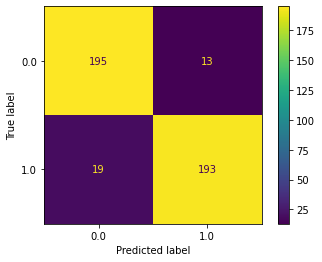

In [127]:
# Train test split of 80-20
x_train, x_test, y_train, y_test = train_test_split(class_data, y, test_size = 0.20)

# creates decision tree classifier; fits data with trained sets; generates predictions from test split
model = DecisionTreeClassifier(random_state = 0)
model.fit(x_train, y_train)
y_prediciton = model.predict(x_test)

# generates confusion matrix and plots data
matrix = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix(model, x_test, y_test)

# prints precision, recall, and f1 score
print(metrics.classification_report(y_test, y_prediction))

### Bias & Variance Characteristics
Looking at the results above from the waving and fistbump data sets of the entire class, the model seems to be underfitting data. 

### Random Forests Model & Results

              precision    recall  f1-score   support

         0.0       0.50      0.48      0.49       220
         1.0       0.45      0.47      0.46       200

    accuracy                           0.47       420
   macro avg       0.47      0.47      0.47       420
weighted avg       0.47      0.47      0.47       420



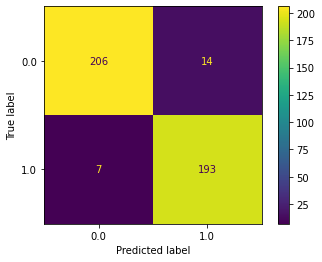

In [128]:
# Train test split of 80-20
x_train, x_test, y_train, y_test = train_test_split(class_data, y, test_size = 0.20)

# creates random forest classifier; fits data with trained sets; generates predictions from test split
model = RandomForestClassifier(random_state = 0)
model.fit(x_train, y_train)
y_prediciton = model.predict(x_test)

# generates confusion matrix and plots data
matrix = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix(model, x_test, y_test)

# prints precision, recall, and f1 score
print(metrics.classification_report(y_test, y_prediction))

### Bias & Variance Characteristics
Given the above results from the waving and fistbump data of the entire class, there seems to be some underfitting occuring since the precision is relatively low.